In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X = X.iloc[:, :-2]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


# Dokładność oceny modelu vs wielkość zbioru testowego.

Zwizualizuj dokładność oceny jakości modelu w zależności od wielkości zbioru testowego.

1. Opracuj scenariusz eksperymentu.
2. Zaimplementuj realizację obliczeń potrzebnych do prezentacji wyników eksperymentu.
3. Zaprezentuj wyniki dobierając odpowiednie wizualizacje.
4. Odpowiedz na pytanie: w jakim przedziale na 90% znajduje się prawdziwa wartość metryki przy zbiorze testowym wielkości rzędu 1-2 tys. obserwacji oraz przy największym rozważanym przez Ciebie zbiorze testowym. Oprzyj obliczenie na kwantylach z otrzymanych zestawów wyników dla danej wielkości zbioru.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
def generate_scores(X, y, test_size, num_trials):
    scores = []
    for _ in range(num_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(r2_score(y_test, y_pred))
    return scores

In [8]:
test_size = 1000
num_trials = 10

generate_scores(X, y, test_size, num_trials)

[0.43490808449714935,
 0.47503935118409146,
 0.5300282584437077,
 0.5582058722620074,
 0.5518678476612898,
 0.5450712902067214,
 0.6138690988219866,
 0.5045215091927873,
 0.5619538716572916,
 0.5813069749891844]

In [15]:
test_sizes = np.arange(2000, X.shape[0], 2000)
test_sizes

array([ 2000,  4000,  6000,  8000, 10000, 12000, 14000, 16000, 18000,
       20000])

In [21]:
scores = []
for test_size in test_sizes:
    scores.append(generate_scores(X, y, test_size, num_trials))

scores

[[0.5390780369340822,
  0.5274033555310146,
  0.5214213210512559,
  0.5698786793461494,
  0.5722255959561608,
  0.5027634596241912,
  0.5332619593808774,
  0.5119727008640571,
  0.530159791823488,
  0.5759669178274684],
 [0.5265216922717842,
  0.538040425148739,
  0.539357497122258,
  0.5538961805607312,
  0.5477881740212818,
  0.5387448999905564,
  0.5510905816815972,
  0.5401177507701944,
  0.5782329850901837,
  0.505715302910946],
 [0.5372417311078661,
  0.544489822510056,
  0.5255394904916135,
  0.5312099115427742,
  0.5571451799789267,
  0.5436164931495839,
  0.5379797641316275,
  0.5359583421580812,
  0.5223487971661549,
  0.5345124932421674],
 [0.5360922077611461,
  0.5329429059488594,
  0.5253563326540905,
  0.5444059459906312,
  0.536201004352777,
  0.5303865114813177,
  0.5375142463895637,
  0.5433190314349314,
  0.3327331520328348,
  0.24948374849378852],
 [0.5438672162992225,
  0.5348701140945815,
  0.5251184564509845,
  0.5336777184176976,
  0.5366801204235494,
  0.4046862

/tmp/ipykernel_56233/3242819763.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[:5], labels=test_sizes[:5])


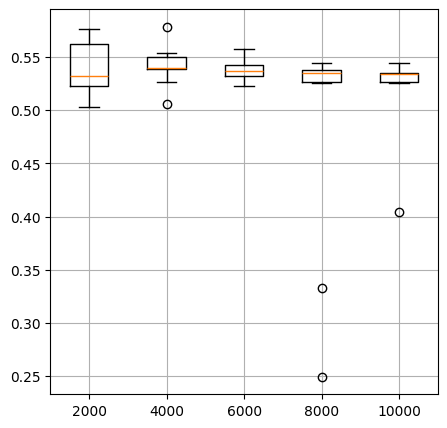

In [24]:
plt.figure(figsize=(5, 5))
plt.boxplot(scores[:5], labels=test_sizes[:5])
plt.grid()
plt.show()

In [27]:
model = LinearRegression()
model.fit?

Signature: model.fit(X, y, sample_weight=None)
Docstring:
Fit linear model.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training data.

y : array-like of shape (n_samples,) or (n_samples, n_targets)
    Target values. Will be cast to X's dtype if necessary.

sample_weight : array-like of shape (n_samples,), default=None
    Individual weights for each sample.

    .. versionadded:: 0.17
       parameter *sample_weight* support to LinearRegression.

Returns
-------
self : object
    Fitted Estimator.
File:      ~/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/linear_model/_base.py
Type:      method

Wariant 2 - dane treningowe całkiem usztywnione (czyli model też - eksperyment z jednym nauczonym modelem).

In [30]:
train_size = 10000
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
model = LinearRegression()
model.fit(X_train, y_train)


def generate_scores(model, X, y, test_size, num_trials):
    scores = []
    for _ in range(num_trials):
        _, X_test_sample, _, y_test_sample = train_test_split(X, y, test_size=test_size)
        y_pred = model.predict(X_test_sample)
        scores.append(r2_score(y_test_sample, y_pred))
    return scores

test_size = 1000
generate_scores(model, X_test, y_test, test_size, num_trials)

[0.5402667264691632,
 0.5513244552266194,
 0.5249607247806527,
 0.5241813331435037,
 0.5305379979102813,
 0.5558059907501229,
 0.5185847357070448,
 0.5537938895621848,
 0.5206271311132074,
 0.5815043075122278]

Wariant 3 - usztywniona wielkość zbioru treningowe, ale konkretne obserwacje losowane w każdej iteracji eksperymentu.

In [31]:
# Ad 4.

test_size = 1000
scores = generate_scores(model, X_test, y_test, test_size, num_trials)
np.quantile(scores, q=[0.05, 0.95])

array([0.53055986, 0.58705412])

In [32]:
test_size = 10000
scores = generate_scores(model, X_test, y_test, test_size, num_trials)
np.quantile(scores, q=[0.05, 0.95])
# ze względu na duże zazębianie się próbek, szacowanie nie jest dokładne - realnie przedział powinien być większy

array([0.54570226, 0.54857495])

In [36]:
X_test.shape[0]

10640

# Skuteczność vs wielkość zbioru treningowego

Stwórz wykres jakości modelu ($r^2$ na zbiorze testowym) względem wielkości zbioru treningowego. Opracuj scenariusz eksperymentu, dobierz sposób wizualizacji.

Wygeneruj go wiele razy (bez ustawiania ziaren losowań). Czy obserwujesz coś dziwnego? Spróbuj wyjaśnić z czego to wynika.

In [43]:
def calculate_r2(X_test, y_test, X_train, y_train, train_size):
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = LinearRegression()
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

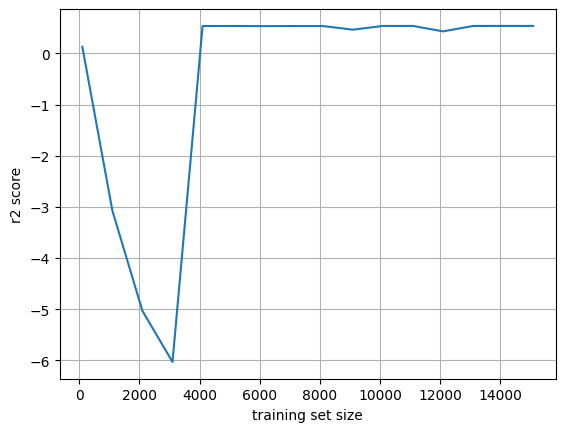

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000)

train_sizes = np.arange(100, X_train.shape[0], 1000)
scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]

plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

In [60]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [68]:
np.quantile(X.AveOccup, q=[0.95, 0.97, 0.99, 0.999])

array([ 4.33341667,  4.63587413,  5.39481203, 13.63044349])

In [69]:
X.quantile(q=0.99)

MedInc          10.596540
HouseAge        52.000000
AveRooms        10.357033
AveBedrms        2.127541
Population    5805.830000
AveOccup         5.394812
Name: 0.99, dtype: float64

In [81]:
quantile = 0.99
test_size = 1000

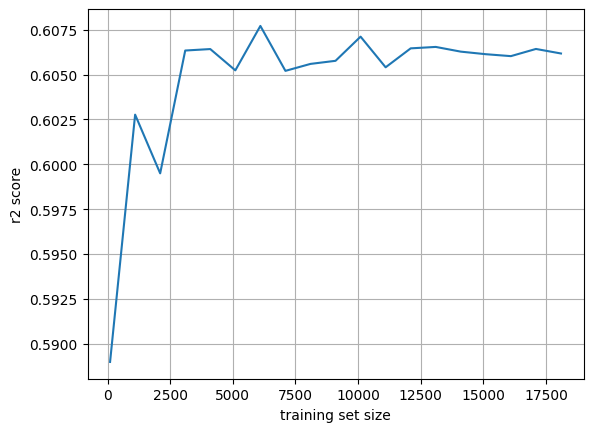

In [92]:
ind = (X <= X.quantile(quantile).values).all(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=test_size)

train_sizes = np.arange(100, X_train.shape[0], 1000)
scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]

plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

In [91]:
ind.mean()

np.float64(0.9594961240310077)

In [94]:
ind = (X <= X.quantile(quantile).values).all(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=test_size)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [95]:
y.min(), y.max()

(np.float64(0.14999), np.float64(5.00001))

In [96]:
y_pred.min(), y_pred.max()

(np.float64(-0.1911824358554306), np.float64(5.596737775797386))

In [98]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# y_pred.min(), y_pred.max()

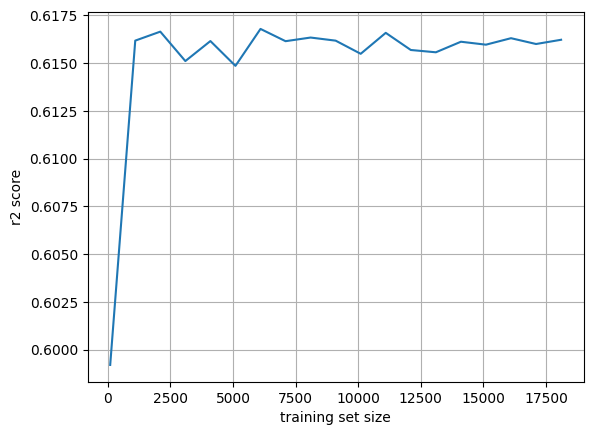

In [105]:
def calculate_r2(X_test, y_test, X_train, y_train, train_size):
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = LinearRegression()
    model.fit(X_train_sample, y_train_sample)
    y_pred = np.clip(model.predict(X_test), 0, 5)
    return r2_score(y_test, y_pred)

ind = (X <= X.quantile(quantile).values).all(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=test_size)

train_sizes = np.arange(100, X_train.shape[0], 1000)
scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]

plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

In [106]:
3**8

6561

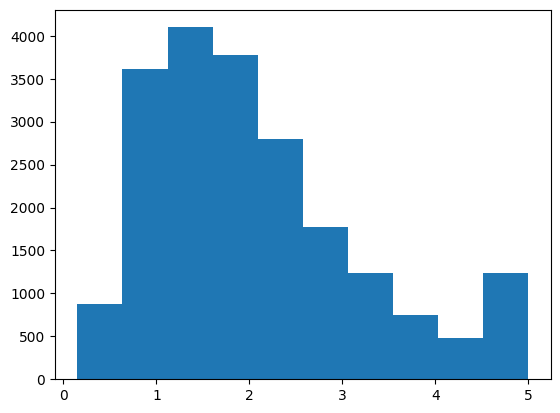

In [110]:
plt.hist(y)
plt.show()

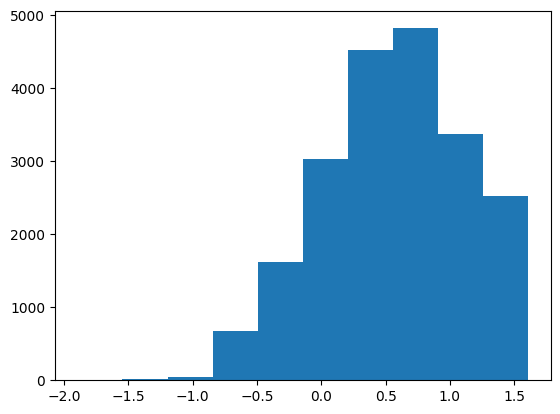

In [111]:
plt.hist(np.log(y))
plt.show()

In [112]:
from sklearn.compose import TransformedTargetRegressor
?TransformedTargetRegressor

Init signature:
TransformedTargetRegressor(
    regressor=None,
    *,
    transformer=None,
    func=None,
    inverse_func=None,
    check_inverse=True,
)
Docstring:     
Meta-estimator to regress on a transformed target.

Useful for applying a non-linear transformation to the target `y` in
regression problems. This transformation can be given as a Transformer
such as the :class:`~sklearn.preprocessing.QuantileTransformer` or as a
function and its inverse such as `np.log` and `np.exp`.

The computation during :meth:`fit` is::

    regressor.fit(X, func(y))

or::

    regressor.fit(X, transformer.transform(y))

The computation during :meth:`predict` is::

    inverse_func(regressor.predict(X))

or::

    transformer.inverse_transform(regressor.predict(X))

Read more in the :ref:`User Guide <transformed_target_regressor>`.

.. versionadded:: 0.20

Parameters
----------
regressor : object, default=None
    Regressor object such as derived from
    :class:`~sklearn.base.RegressorMixin`. 

In [113]:
regressor = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
regressor.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [114]:
regressor.predict(X_test)

array([ 1.82918568,  1.06117423,  1.95103676,  1.79925977,  1.87560312,
        0.89477661,  1.8813109 ,  2.08950429,  1.21504565,  1.31874806,
        2.76203849,  1.0541872 ,  2.88985735,  1.59892572,  2.68679573,
        1.40657941,  1.31223153,  1.28272573,  2.37712348,  2.00781881,
        0.86944705,  1.14528738,  1.143901  ,  2.73295061,  1.69926062,
        1.59128458,  1.55986152,  2.28061156,  1.52202887,  1.59321867,
        1.84908438,  1.66098579,  2.11836127,  2.58407557,  2.17217348,
        1.34009527,  0.94152289,  1.10280903,  1.34519561,  1.2410484 ,
        1.7705941 ,  1.40491393,  1.88662985,  2.69211079,  1.68329678,
        1.99192485,  1.27098257,  2.3156449 ,  4.56420695,  2.30423373,
        1.82562913,  1.56039393,  1.74620208,  2.25118974,  1.66701704,
        1.60822486,  1.18080941,  2.34058904,  2.04650235,  1.67887465,
        1.80511856,  1.90707097,  1.7484331 ,  1.29731221,  2.38132921,
        2.51833632,  1.65806741,  1.11560939,  1.37578739,  1.73

# Transformacje zmiennej celu i automatyzacja eksperymentów

Zaimplementuj testy modelu regresji liniowej z różnymi transformacjami zmiennej celu (w zestawieniu uwzględnij też model bez transformacji). Użyj klasy `TranformedTargetRegressor` z modulu `sklearn.compose`. Nie używaj klasy `GridSearchCV`. Zaimplementuj funkcję, która zwróci tabelkę z wynikami testów - informacją jakie przekształcenia dało jakie wyniki (metryka r-kwadrat), a arguemntem będzie lista transformacji do rozważenia (+ inne konieczne zmienne).

Zaimplementuj testy tak, aby rozszerzanie ich o inne transformacje wymagało minimalnego nakładu pracy.

In [ ]:
def test_transformation(transform_func, inverse_func, X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = TransformedTargetRegressor(LinearRegression(), 
                                       func=transform_func, 
                                       inverse_func=inverse_func)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return {
        'transform_func': transform_func,
        'inverse_func': inverse_func,
        'r2': r2
    }

def test_transformations(transformations: list[tuple], X, y):
    return [test_transformation(transformation[0], transformation[1], X, y) for transformation in transformations]

# bład metodologiczny: podział powinien być raz przed testami


In [ ]:
test_transformations(
    [(None, None), (np.log, np.exp),(np.sqrt, np.square)],
     X,
     y
)

In [128]:
def test_transformation(transform_func, inverse_func, X_train, X_test, y_train, y_test):

    model = TransformedTargetRegressor(LinearRegression(), func=transform_func, inverse_func=inverse_func)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return {
        'transform_func': "identity" if transform_func is None else transform_func.__name__,
        'inverse_func': "identity" if inverse_func is None else inverse_func.__name__,
        'r2': r2

    }

def test_transformations(transformations: list[tuple], X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    results = pd.DataFrame([test_transformation(transformation[0], transformation[1], X_train, X_test, y_train, y_test) for transformation in transformations])
    return results

In [129]:
results = test_transformations(
    [(None, None), (np.log, np.exp),(np.sqrt, np.square)],
     X,
     y
)
results

,transform_func,inverse_func,r2
0,identity,identity,0.536965
1,log,exp,-1.032700
2,sqrt,square,0.445559


In [132]:
target_transformations = [(None, None), (np.log, np.exp),(np.sqrt, np.square)]
target_transformations = [{"func": func, "inverse_func": inverse_func} for func, inverse_func in target_transformations]
target_transformations

[{'func': None, 'inverse_func': None},
 {'func': <ufunc 'log'>, 'inverse_func': <ufunc 'exp'>},
 {'func': <ufunc 'sqrt'>, 'inverse_func': <ufunc 'square'>}]

In [133]:
def test_transformation(transformation, X_train, X_test, y_train, y_test):

    model = TransformedTargetRegressor(LinearRegression(), 
                                       func=transformation["func"], 
                                       inverse_func=transformation["inverse_func"])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return {
        'transform_func': "identity" if  transformation["func"] is None else transformation["func"].__name__,
        'inverse_func': "identity" if transformation["inverse_func"] is None else transformation["inverse_func"].__name__,
        'r2': r2
    }

def test_transformations(transformations: list[dict], X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    results = pd.DataFrame([test_transformation(transformation, X_train, X_test, y_train, y_test) for transformation in transformations])
    return results

test_transformations(target_transformations, X, y)

,transform_func,inverse_func,r2
0,identity,identity,0.555786
1,log,exp,-0.026057
2,sqrt,square,0.501449


In [135]:
def test_transformations(transformations: list[dict], X_train, X_test, y_train, y_test):
    results = pd.DataFrame([test_transformation(transformation, X_train, X_test, y_train, y_test) for transformation in transformations])
    return results


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
test_transformations(target_transformations, X_train, X_test, y_train, y_test)

,transform_func,inverse_func,r2
0,identity,identity,0.554873
1,log,exp,-0.042067
2,sqrt,square,0.505208


In [139]:
MIN_PRED, MAX_PRED = 0, 5

target_transformations = [
    (None, None), 
    (np.log, np.exp),
    (np.sqrt, np.square), 
    (lambda x: x, lambda y: np.clip(y, MIN_PRED, MAX_PRED)),
    (np.log, lambda x: np.clip(np.exp(x), MIN_PRED, MAX_PRED)),
]

target_transformations = [{"func": func, "inverse_func": inverse_func} for func, inverse_func in target_transformations]


test_transformations(target_transformations, X_train, X_test, y_train, y_test)

/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


,transform_func,inverse_func,r2
0,identity,identity,0.554873
1,log,exp,-0.042067
2,sqrt,square,0.505208
3,<lambda>,<lambda>,0.567353
4,log,<lambda>,0.532304


In [141]:
def exp_clipped(x):
    return np.clip(np.exp(x), MIN_PRED, MAX_PRED)

target_transformations = [
    (None, None), 
    (np.log, np.exp),
    (np.sqrt, np.square), 
    (lambda x: x, lambda y: np.clip(y, MIN_PRED, MAX_PRED)),
    (np.log, lambda x: np.clip(np.exp(x), MIN_PRED, MAX_PRED)),
    (np.log, exp_clipped),
]

In [142]:
def convert_to_clipped(f):
    def f_clipped(x):
        y = f(x)
        y_clipped = np.clip(y, MIN_PRED, MAX_PRED)
        return y_clipped
    return f_clipped

In [143]:
target_transformations = [
    (None, None), 
    (np.log, np.exp),
    (np.sqrt, np.square), 
    (lambda x: x, lambda y: np.clip(y, MIN_PRED, MAX_PRED)),
    (np.log, lambda x: np.clip(np.exp(x), MIN_PRED, MAX_PRED)),
    (np.log, exp_clipped),
    (np.log, convert_to_clipped(np.exp)),
    (np.sqrt, convert_to_clipped(np.square)),
]

In [145]:
@convert_to_clipped
def exp_clipped(x):
    return np.exp(x)

target_transformations.append(
    (np.log, exp_clipped)
)

In [146]:
target_transformations.append(
    (np.log1p, np.expm1)
)

In [148]:
target_transformations = [{"func": func, "inverse_func": inverse_func} for func, inverse_func in target_transformations]
target_transformations


[{'func': None, 'inverse_func': None},
 {'func': <ufunc 'log'>, 'inverse_func': <ufunc 'exp'>},
 {'func': <ufunc 'sqrt'>, 'inverse_func': <ufunc 'square'>},
 {'func': <function __main__.<lambda>(x)>,
  'inverse_func': <function __main__.<lambda>(y)>},
 {'func': <ufunc 'log'>, 'inverse_func': <function __main__.<lambda>(x)>},
 {'func': <ufunc 'log'>, 'inverse_func': <function __main__.exp_clipped(x)>},
 {'func': <ufunc 'log'>,
  'inverse_func': <function __main__.convert_to_clipped.<locals>.f_clipped(x)>},
 {'func': <ufunc 'sqrt'>,
  'inverse_func': <function __main__.convert_to_clipped.<locals>.f_clipped(x)>},
 {'func': <ufunc 'log'>,
  'inverse_func': <function __main__.convert_to_clipped.<locals>.f_clipped(x)>},
 {'func': <ufunc 'log1p'>, 'inverse_func': <ufunc 'expm1'>}]

In [149]:
test_transformations(target_transformations, X_train, X_test, y_train, y_test)

/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/home/norbert/Other/Sages/UczenieMaszynoweW

,transform_func,inverse_func,r2
0,identity,identity,0.554873
1,log,exp,-0.042067
2,sqrt,square,0.505208
3,<lambda>,<lambda>,0.567353
4,log,<lambda>,0.532304
5,log,exp_clipped,0.532304
6,log,f_clipped,0.532304
7,sqrt,f_clipped,0.561014
8,log,f_clipped,0.532304
9,log1p,expm1,0.398708


In [152]:
@convert_to_clipped
def expm1_clipped(x):
    return np.expm1(x)

target_transformations = [
    (None, None), 
    (np.log, np.exp),
    (np.sqrt, np.square), 
    (np.log, exp_clipped),
    (np.log1p, expm1_clipped)
]

target_transformations = [{"func": func, "inverse_func": inverse_func} for func, inverse_func in target_transformations]
test_transformations(target_transformations, X_train, X_test, y_train, y_test)

/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


,transform_func,inverse_func,r2
0,identity,identity,0.554873
1,log,exp,-0.042067
2,sqrt,square,0.505208
3,log,f_clipped,0.532304
4,log1p,f_clipped,0.551624


In [153]:
from sklearn.preprocessing import PowerTransformer

In [155]:
power_transformer = PowerTransformer()
power_transformer.fit(X)

PowerTransformer()

In [156]:
power_transformer.lambdas_

array([-0.19850992,  0.80814809, -0.5536698 , -4.39408222,  0.23352364,
       -0.90134561])

In [157]:
power_transformer.transform(X)

array([[ 1.90328852,  0.97596837,  1.106394  , -0.29693392, -1.61996655,
        -0.3687632 ],
       [ 1.8970809 , -0.56889299,  0.7123666 , -0.8473362 ,  1.09035533,
        -1.18626485],
       [ 1.60436139,  1.7610103 ,  1.67364461,  0.16249259, -1.13985255,
         0.00505285],
       ...,
       [-1.5094258 , -0.90585048,  0.04928114,  0.54334474, -0.23941874,
        -0.76445482],
       [-1.32391444, -0.82037197,  0.13769186,  0.91675146, -0.64785475,
        -1.15852734],
       [-0.8195291 , -0.99224544,  0.084676  ,  0.85081193,  0.21940523,
        -0.27115865]])

In [ ]:
power_transformer.inverse_transform

In [158]:
TransformedTargetRegressor?

Init signature:
TransformedTargetRegressor(
    regressor=None,
    *,
    transformer=None,
    func=None,
    inverse_func=None,
    check_inverse=True,
)
Docstring:     
Meta-estimator to regress on a transformed target.

Useful for applying a non-linear transformation to the target `y` in
regression problems. This transformation can be given as a Transformer
such as the :class:`~sklearn.preprocessing.QuantileTransformer` or as a
function and its inverse such as `np.log` and `np.exp`.

The computation during :meth:`fit` is::

    regressor.fit(X, func(y))

or::

    regressor.fit(X, transformer.transform(y))

The computation during :meth:`predict` is::

    inverse_func(regressor.predict(X))

or::

    transformer.inverse_transform(regressor.predict(X))

Read more in the :ref:`User Guide <transformed_target_regressor>`.

.. versionadded:: 0.20

Parameters
----------
regressor : object, default=None
    Regressor object such as derived from
    :class:`~sklearn.base.RegressorMixin`. 

In [159]:
PowerTransformer?

Init signature: PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)
Docstring:     
Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations
that are applied to make data more Gaussian-like. This is useful for
modeling issues related to heteroscedasticity (non-constant variance),
or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the
Yeo-Johnson transform. The optimal parameter for stabilizing variance and
minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson
supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the
transformed data.

For an example visualization, refer to :ref:`Compare PowerTransformer with
other scalers <plot_all_scaling_power_transformer_section>`. To see the
effect of Box-Co

In [160]:
def test_transformation(transformation, X_train, X_test, y_train, y_test):

    model = TransformedTargetRegressor(LinearRegression(),
                                       func=transformation.get("func"),
                                       inverse_func=transformation.get("inverse_func"),
                                       transformer=transformation.get("transformer")
                                      )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    result_dict =  {
        'transformer': transformation.get("transformer"),
        'transform_func': None if transformation.get("func") is None else transformation.get("func").__name__,
        'inverse_func': None if transformation.get("inverse_func") is None else transformation.get("inverse_func").__name__,
        'r2': r2
    }

    return {key: value for key, value in result_dict.items() if value is not None}

In [161]:
def test_transformations(transformations: list[dict], X_train, X_test, y_train, y_test):
    return pd.DataFrame([test_transformation(transformation, X_train, X_test, y_train, y_test) for transformation in transformations])

In [167]:
def test_transformation(transformation, X_train, X_test, y_train, y_test):

    model = TransformedTargetRegressor(LinearRegression(), **transformation)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    result_dict =  {
        'transformer': transformation.get("transformer"),
        'transform_func': None if transformation.get("func") is None else transformation.get("func").__name__,
        'inverse_func': None if transformation.get("inverse_func") is None else transformation.get("inverse_func").__name__,
        'r2': r2
    }

    return {key: value for key, value in result_dict.items() if value is not None}

In [170]:
target_transformations = [{'func': None, 'inverse_func': None},
                          {'func': np.log, 'inverse_func': np.exp},
                          {'func': np.sqrt, 'inverse_func': np.square},
                          {'func': np.sqrt, 'inverse_func': convert_to_clipped(np.square)},
                          {'func': np.log, 'inverse_func': exp_clipped},
                          {'func': np.log1p, 'inverse_func': np.expm1},
                          {'func': np.log1p, 'inverse_func': expm1_clipped},
                          {'transformer': PowerTransformer()},
                          {'transformer': PowerTransformer(method="box-cox")}
                         ]

# gdybyśmy chcieli dodać clipping do transformatora:
# zrobić klasę, w której nadpiszemy metode inverse_transform
# wskazówka: można wykorzysać dziedzicznie

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

test_transformations(target_transformations, X_train, X_test, y_train, y_test)

/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


,r2,transform_func,inverse_func,transformer
0,0.531043,NaN,NaN,NaN
1,-0.512229,log,exp,NaN
2,0.451267,sqrt,square,NaN
3,0.549301,sqrt,f_clipped,NaN
4,0.521360,log,f_clipped,NaN
5,0.268281,log1p,expm1,NaN
6,0.540745,log1p,f_clipped,NaN
7,-1.164218,NaN,NaN,PowerTransformer()
8,0.056656,NaN,NaN,PowerTransformer(method='box-cox')


In [171]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("power_transformer", PowerTransformer()),
    ("model", LinearRegression())
])

In [172]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('power_transformer', PowerTransformer()),
                ('model', LinearRegression())])

In [173]:
pipeline.predict(X_test)

array([2.27772138, 0.82110564, 2.78054973, ..., 2.01103473, 1.24353938,
       2.18410719])

In [177]:
pipeline.steps[0][1].lambdas_

array([-0.18991397,  0.81634511, -0.55668111, -4.2317928 ,  0.23570513,
       -0.89756922])

In [181]:
pipeline.named_steps["model"].coef_

array([ 0.9846225 ,  0.22523715, -0.28586381,  0.16309736,  0.02490287,
       -0.25779894])

In [182]:
PowerTransformer().fit_transform(X_train)

array([[-0.04134737, -1.08759385,  0.1791378 ,  0.45334539,  1.92219609,
        -0.1390526 ],
       [ 0.49010853, -1.17576105,  0.84921944, -0.01489358,  0.11655635,
         0.30033836],
       [ 0.97594949, -2.25151257,  0.59384574,  0.770887  ,  3.34225228,
        -0.23248194],
       ...,
       [-1.31824344, -1.0004336 , -0.57044651,  0.80978254, -0.00961462,
        -0.79567135],
       [-0.24852174,  1.04483755, -0.50685829, -0.10380903, -0.15925921,
        -1.34239507],
       [-1.30879398, -0.25203312,  0.06791885, -0.03969077,  0.2976781 ,
         1.43519476]])

In [189]:
pipeline.named_steps

{'power_transformer': PowerTransformer(), 'model': LinearRegression()}

Przetestować jedną pętlą:

- czystą regresję liniową
- regresję liniowąz zlogarytmowaną zmienną celu
- pipeline z przeksztalceniem potęgowym zmiennych objaśniających (X)
- połączenie 2 i 3

In [191]:
def evaluate_pipeline(X_train, X_test, y_train, y_test, pipeline_args):

    pipeline = Pipeline([
        ('transformer', pipeline_args.get('transformer')),
        ('regressor', pipeline_args.get('regressor'))
    ])
    pipeline.fit(X_train,y_train)

    return r2_score(y_test, pipeline.predict(X_test))

In [192]:
experiments = {
    'lr' : {
        'transformer' : None,
        'regressor' : LinearRegression()
    },
    'lr_log_y' : {
        'transformer' : None,
        'regressor' : TransformedTargetRegressor(
            LinearRegression(),
            func = np.log,
            inverse_func = np.exp
        )
    },
    'lr_pwr_transf_X' : {
        'transformer' : PowerTransformer(),
        'regressor' : LinearRegression()
    },
    'lr_log_y_pwr_transf_X' : {
        'transformer' : PowerTransformer(),
        'regressor' : TransformedTargetRegressor(
            LinearRegression(),
            func = np.log,
            inverse_func = np.exp
        )
    }
}

experiments_scores = {}
for experiment, pipeline_args in experiments.items():
    experiments_scores[experiment] = evaluate_pipeline(
        X_train,
        X_test,
        y_train,
        y_test,
        pipeline_args
    )

In [193]:
pd.DataFrame(experiments_scores,index = ['r2_score']).T

,r2_score
lr,0.531043
lr_log_y,-0.512229
lr_pwr_transf_X,0.564339
lr_log_y_pwr_transf_X,0.597043


In [194]:
pipelines_to_test = [
    [('model', LinearRegression())],
    [('model', TransformedTargetRegressor(func=np.log1p, inverse_func=np.expm1))],
    [('exp_transform', PowerTransformer()), ('model', LinearRegression())],
    [('exp_transform', PowerTransformer()), ('model', TransformedTargetRegressor(func=np.log1p, inverse_func=np.expm1))]
]


for pipe in pipelines_to_test:
    pipeline = Pipeline(pipe)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{r2_score(y_true=y_test, y_pred=y_pred)=}")

r2_score(y_true=y_test, y_pred=y_pred)=0.5310427554968654
r2_score(y_true=y_test, y_pred=y_pred)=0.268281002849867
r2_score(y_true=y_test, y_pred=y_pred)=0.564339242350562
r2_score(y_true=y_test, y_pred=y_pred)=0.603430751867903


In [195]:
models = [
    LinearRegression(),
    TransformedTargetRegressor(LinearRegression(), func=np.log1p, inverse_func=np.expm1),
    Pipeline([
         ("power_transformer", PowerTransformer()),
         ("model", LinearRegression())
    ]),
    Pipeline([
         ("power_transformer", PowerTransformer()),
         ("model", TransformedTargetRegressor(LinearRegression(), func=np.log1p, inverse_func=np.expm1))
    ]),
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'model': model,
        'r2': r2_score(y_test, y_pred)
    }) 

pd.DataFrame(results)

,model,r2
0,LinearRegression(),0.548649
1,TransformedTargetRegressor(func=<ufunc 'log1p'...,0.111582
2,"(PowerTransformer(), LinearRegression())",0.578258
3,"(PowerTransformer(), TransformedTargetRegresso...",0.617702


In [ ]:
Pipeline([
     ("power_transformer", PowerTransformer()),
     ("model", TransformedTargetRegressor(LinearRegression(), func=np.log1p, inverse_func=np.expm1))
])

In [ ]:
TransformedTargetRegressor(
    Pipeline([
        ("power_transformer", PowerTransformer()),
        ("model", LinearRegression())]),
    func=np.log1p,
    inverse_func=np.expm1
)

Co do zasady: drugi wariant właściwszy, ale mogą być wyjątki.

In [196]:
models = [
    LinearRegression(),
    TransformedTargetRegressor(LinearRegression(), func=np.log1p, inverse_func=np.expm1),
    Pipeline([
         ("power_transformer", PowerTransformer()),
         ("model", LinearRegression())
    ]),
    Pipeline([
         ("power_transformer", PowerTransformer()),
         ("model", TransformedTargetRegressor(LinearRegression(), func=np.log1p, inverse_func=np.expm1))
    ]),
    TransformedTargetRegressor(
        Pipeline([
            ("power_transformer", PowerTransformer()),
            ("model", LinearRegression())]),
        func=np.log1p,
        inverse_func=np.expm1
)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'model': model,
        'r2': r2_score(y_test, y_pred)
    }) 

pd.DataFrame(results)

,model,r2
0,LinearRegression(),0.537227
1,TransformedTargetRegressor(func=<ufunc 'log1p'...,0.184723
2,"(PowerTransformer(), LinearRegression())",0.568043
3,"(PowerTransformer(), TransformedTargetRegresso...",0.612416
4,TransformedTargetRegressor(func=<ufunc 'log1p'...,0.612416


In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

models = [
    LinearRegression(),
    TransformedTargetRegressor(LinearRegression(), func=np.log1p, inverse_func=np.expm1),
    Pipeline([
         ("power_transformer", PowerTransformer()),
         ("model", LinearRegression())
    ]),
    Pipeline([
         ("power_transformer", PowerTransformer()),
         ("model", TransformedTargetRegressor(LinearRegression(), func=np.log1p, inverse_func=np.expm1))
    ]),
    TransformedTargetRegressor(
        Pipeline([
            ("power_transformer", PowerTransformer()),
            ("model", LinearRegression())]),
        func=np.log1p,
        inverse_func=np.expm1),
    Pipeline([
         ("scaler", StandardScaler()),
         ("model", Ridge(alpha=1))
    ]),
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'model': model,
        'r2': r2_score(y_test, y_pred)
    }) 

pd.DataFrame(results)

,model,r2
0,LinearRegression(),0.521165
1,TransformedTargetRegressor(func=<ufunc 'log1p'...,0.268247
2,"(PowerTransformer(), LinearRegression())",0.568733
3,"(PowerTransformer(), TransformedTargetRegresso...",0.609361
4,TransformedTargetRegressor(func=<ufunc 'log1p'...,0.609361
5,"(StandardScaler(), Ridge(alpha=1))",0.521200


In [198]:
from sklearn.model_selection import GridSearchCV

In [200]:
pipeline = Pipeline([
         ("scaler", StandardScaler()),
         ("model", Ridge(alpha=1))
    ])
param_grid = {"model__alpha": [0.1, 1, 10]}

optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring="r2", n_jobs=-1)
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=-1, param_grid={'model__alpha': [0.1, 1, 10]},
             scoring='r2')

In [201]:
optimizer.best_params_

{'model__alpha': 10}

In [202]:
optimizer.cv_results_

{'mean_fit_time': array([0.01322122, 0.01351213, 0.01425045]),
 'std_fit_time': array([0.00206479, 0.00074848, 0.00127564]),
 'mean_score_time': array([0.00435257, 0.00432785, 0.00437901]),
 'std_score_time': array([0.00126369, 0.00078675, 0.00074724]),
 'param_model__alpha': masked_array(data=[0.1, 1.0, 10.0],
              mask=[False, False, False],
        fill_value=1e+20),
 'params': [{'model__alpha': 0.1}, {'model__alpha': 1}, {'model__alpha': 10}],
 'split0_test_score': array([0.56093572, 0.56094636, 0.56104741]),
 'split1_test_score': array([0.55445451, 0.55443523, 0.55424051]),
 'split2_test_score': array([0.5338329 , 0.53382321, 0.53372384]),
 'split3_test_score': array([0.53625363, 0.53626935, 0.53642068]),
 'split4_test_score': array([0.52423404, 0.52423482, 0.52423752]),
 'split5_test_score': array([0.53361924, 0.53365853, 0.53404164]),
 'split6_test_score': array([0.57211917, 0.57209888, 0.57189425]),
 'split7_test_score': array([0.55478872, 0.55479028, 0.55480117]),
 's

In [203]:
optimizer.cv_results_["params"]

[{'model__alpha': 0.1}, {'model__alpha': 1}, {'model__alpha': 10}]

In [204]:
optimizer.cv_results_["mean_test_score"]

array([0.53927731, 0.53928059, 0.53930876])

In [205]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [209]:
optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring="r2", verbose=3)
optimizer.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END .................model__alpha=0.1;, score=0.561 total time=   0.0s
[CV 2/10] END .................model__alpha=0.1;, score=0.554 total time=   0.0s
[CV 3/10] END .................model__alpha=0.1;, score=0.534 total time=   0.0s
[CV 4/10] END .................model__alpha=0.1;, score=0.536 total time=   0.0s
[CV 5/10] END .................model__alpha=0.1;, score=0.524 total time=   0.0s
[CV 6/10] END .................model__alpha=0.1;, score=0.534 total time=   0.0s
[CV 7/10] END .................model__alpha=0.1;, score=0.572 total time=   0.0s
[CV 8/10] END .................model__alpha=0.1;, score=0.555 total time=   0.0s
[CV 9/10] END .................model__alpha=0.1;, score=0.491 total time=   0.0s
[CV 10/10] END ................model__alpha=0.1;, score=0.531 total time=   0.0s
[CV 1/10] END ...................model__alpha=1;, score=0.561 total time=   0.0s
[CV 2/10] END ...................model__alpha=1;

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             param_grid={'model__alpha': [0.1, 1, 10]}, scoring='r2',
             verbose=3)

In [212]:
optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring="r2", verbose=3, n_jobs=4)
optimizer.fit(X_train, y_train)

[CV 2/10] END .................model__alpha=0.1;, score=0.554 total time=   0.0s
[CV 7/10] END .................model__alpha=0.1;, score=0.572 total time=   0.0s
[CV 9/10] END .................model__alpha=0.1;, score=0.491 total time=   0.0s
[CV 1/10] END ...................model__alpha=1;, score=0.561 total time=   0.0s
[CV 3/10] END ...................model__alpha=1;, score=0.534 total time=   0.0s
[CV 5/10] END ...................model__alpha=1;, score=0.524 total time=   0.0s
[CV 7/10] END ...................model__alpha=1;, score=0.572 total time=   0.0s
[CV 9/10] END ...................model__alpha=1;, score=0.491 total time=   0.0s
[CV 10/10] END ..................model__alpha=1;, score=0.531 total time=   0.0s
[CV 3/10] END ..................model__alpha=10;, score=0.534 total time=   0.0s
[CV 4/10] END ..................model__alpha=10;, score=0.536 total time=   0.0s
[CV 7/10] END ..................model__alpha=10;, score=0.572 total time=   0.0s
[CV 9/10] END ..............

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=4, param_grid={'model__alpha': [0.1, 1, 10]}, scoring='r2',
             verbose=3)

In [213]:
optimizer.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=10))])

In [214]:
r2_score(y_test, optimizer.best_estimator_.predict(X_test))

0.5215070143292768

[CV 3/10] END .................model__alpha=0.1;, score=0.534 total time=   0.0s
[CV 7/10] END .................model__alpha=0.1;, score=0.572 total time=   0.0s
[CV 9/10] END .................model__alpha=0.1;, score=0.491 total time=   0.0s
[CV 1/10] END ...................model__alpha=1;, score=0.561 total time=   0.0s
[CV 3/10] END ...................model__alpha=1;, score=0.534 total time=   0.0s
[CV 5/10] END ...................model__alpha=1;, score=0.524 total time=   0.0s
[CV 7/10] END ...................model__alpha=1;, score=0.572 total time=   0.0s
[CV 10/10] END ..................model__alpha=1;, score=0.531 total time=   0.0s
[CV 4/10] END ..................model__alpha=10;, score=0.536 total time=   0.0s
[CV 8/10] END ..................model__alpha=10;, score=0.555 total time=   0.0s
[CV 1/10] END .................model__alpha=0.1;, score=0.561 total time=   0.0s
[CV 5/10] END .................model__alpha=0.1;, score=0.524 total time=   0.0s
[CV 6/10] END ..............

In [217]:
pipeline = Pipeline([
    ("power_transformer", PowerTransformer()),
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1))
])

param_grid = {
    "power_transformer": [None, PowerTransformer()],
    "model__alpha": [0.1, 1, 10]
}

optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring="r2", n_jobs=-1)
optimizer.fit(X_train, y_train)
optimizer.best_params_

{'model__alpha': 10, 'power_transformer': PowerTransformer()}

Znajdź najlepsze rozwiązanie naszego problemu. Uwzględnij w optymalizacji:
- transformowanie (lub nie) zmiennej celu)
- model czysty lub z regularyzacją
- uzywanie lub nie power transformera.
- *siłę regularyzacji

In [218]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [220]:
pipeline = Pipeline([
    ("scaler", None),
    ("model", None)
])

param_grid = [
    {
        "scaler": [None],
        "model": [LinearRegression()]
    },
    {
        "scaler": [StandardScaler()],
        "model": [Ridge()],
        "model__alpha": [0.1, 1, 10]
    }
]

optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring="r2", n_jobs=-1)
optimizer.fit(X_train, y_train)
optimizer.cv_results_["params"]

[{'model': LinearRegression(), 'scaler': None},
 {'model': Ridge(), 'model__alpha': 0.1},
 {'model': Ridge(), 'model__alpha': 1},
 {'model': Ridge(), 'model__alpha': 10}]

In [221]:
optimizer.best_params_

{'model': Ridge(), 'model__alpha': 10}

In [ ]:
obietk1__obiekt2__parameter

In [223]:
pipeline = Pipeline([
    ("scaler", None),
    ("model", TransformedTargetRegressor(regressor=None))
])

param_grid = [
    {
        "scaler": [None],
        "model__regressor": [LinearRegression()],
        "model__func": [None, np.log1p],
        "model__inverse_func": [None, np.expm1]
    },
    # {
    #     "scaler": [StandardScaler()],
    #     "model__regressor": [Ridge()],
    #     "model__regressor__alpha": [0.1, 1, 10]
    # }
]

optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring="r2", n_jobs=-1)
optimizer.fit(X_train, y_train)
optimizer.cv_results_["params"]

/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/norbert/Other/Sages/UczenieMaszynoweWPythonWproiwadzenie/ml_311/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
 

[{'model__func': None,
  'model__inverse_func': None,
  'model__regressor': LinearRegression(),
  'scaler': None},
 {'model__func': None,
  'model__inverse_func': <ufunc 'expm1'>,
  'model__regressor': LinearRegression(),
  'scaler': None},
 {'model__func': <ufunc 'log1p'>,
  'model__inverse_func': None,
  'model__regressor': LinearRegression(),
  'scaler': None},
 {'model__func': <ufunc 'log1p'>,
  'model__inverse_func': <ufunc 'expm1'>,
  'model__regressor': LinearRegression(),
  'scaler': None}]

In [224]:
from sklearn.preprocessing import FunctionTransformer
FunctionTransformer?

Init signature:
FunctionTransformer(
    func=None,
    inverse_func=None,
    *,
    validate=False,
    accept_sparse=False,
    check_inverse=True,
    feature_names_out=None,
    kw_args=None,
    inv_kw_args=None,
)
Docstring:     
Constructs a transformer from an arbitrary callable.

A FunctionTransformer forwards its X (and optionally y) arguments to a
user-defined function or function object and returns the result of this
function. This is useful for stateless transformations such as taking the
log of frequencies, doing custom scaling, etc.

Note: If a lambda is used as the function, then the resulting
transformer will not be pickleable.

.. versionadded:: 0.17

Read more in the :ref:`User Guide <function_transformer>`.

Parameters
----------
func : callable, default=None
    The callable to use for the transformation. This will be passed
    the same arguments as transform, with args and kwargs forwarded.
    If func is None, then func will be the identity function.

inverse_f

In [225]:
pipeline = Pipeline([
    ("scaler", None),
    ("model", TransformedTargetRegressor(regressor=None))
])

param_grid = [
    {
        "scaler": [None],
        "model__regressor": [LinearRegression()],
        "model__transformer": [None, FunctionTransformer(np.log1p, np.expm1)]
    },
    # {
    #     "scaler": [StandardScaler()],
    #     "model__regressor": [Ridge()],
    #     "model__regressor__alpha": [0.1, 1, 10]
    # }
]

optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring="r2", n_jobs=-1)
optimizer.fit(X_train, y_train)
optimizer.cv_results_["params"]

[{'model__regressor': LinearRegression(),
  'model__transformer': None,
  'scaler': None},
 {'model__regressor': LinearRegression(),
  'model__transformer': FunctionTransformer(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>),
  'scaler': None}]

In [ ]:
param_grid = [
    {
        "scaler": [None],
        "model__regressor": [LinearRegression()],
        # "model__func": [None],
        # "model__inverse_func": [None]
    },
    {
        "scaler": [None],
        "model__regressor": [LinearRegression()],
        "model__func": [np.log1p],
        "model__inverse_func": [np.expm1]
    },
    # {
    #     "scaler": [StandardScaler()],
    #     "model__regressor": [Ridge()],
    #     "model__regressor__alpha": [0.1, 1, 10]
    # }
]

In [ ]:
pipeline = TransformedTargetRegressor(
    Pipeline([
        ("scaler", None),
        ("model", None)
        ]),
    func=None, 
    inverse_func=None)

param_grid = [
    {
        "regressor__scaler": [StandardScaler()],
        "regressor__model": [Ridge()]
    }
    ,
    {
        "regressor__scaler": [StandardScaler()],
        "regressor__model": [Ridge()],
        "func": [np.log1p],
        "inverse_func": [np.expm1]
    }
]
              
optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', verbose=3, n_jobs=-1, refit=True)
optimizer.fit(X_train, y_train)

In [229]:
pipeline = TransformedTargetRegressor(
    Pipeline([
        ("power_transformer", None),
        ("scaler", None),
        ("model", None)
        ]),
    func=None, 
    inverse_func=None)

param_grid = [
    {
        "regressor__scaler": [StandardScaler()],
        "regressor__model": [Ridge()]
    }
    ,
    {
        "regressor__scaler": [StandardScaler()],
        "regressor__model": [Ridge()],
        "func": [np.log1p],
        "inverse_func": [np.expm1]
    }
]

In [230]:
power_transformer_grid = {"regressor__power_transformer": [None, PowerTransformer()]}

In [231]:
{**{"a": 1}, **{"b":2}}

{'a': 1, 'b': 2}

In [232]:
[{**base_grid, **power_transformer_grid} for base_grid in param_grid]

[{'regressor__scaler': [StandardScaler()],
  'regressor__model': [Ridge()],
  'regressor__power_transformer': [None, PowerTransformer()]},
 {'regressor__scaler': [StandardScaler()],
  'regressor__model': [Ridge()],
  'func': [<ufunc 'log1p'>],
  'inverse_func': [<ufunc 'expm1'>],
  'regressor__power_transformer': [None, PowerTransformer()]}]

In [237]:
{"regressor__model": [*[Ridge(alpha) for alpha in [0.1, 1, 10]], LinearRegression()]}

{'regressor__model': [Ridge(alpha=0.1),
  Ridge(alpha=1),
  Ridge(alpha=10),
  LinearRegression()]}

In [238]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [241]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True, random_state=42) # dopiero teraz jest poprawne (bo losowe) dzielenie na foldy!
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring='r2', verbose=3, n_jobs=-1, refit=True)

In [243]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


In [ ]:
cv = ShuffleSplit(n_splits=1, test_size=0.2) # podział na train + val- w przypadku bardzo dużych danych
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring='r2', verbose=3, n_jobs=-1, refit=True)

In [244]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor?

Init signature:
KNeighborsRegressor(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.

In [248]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor())
])

param_grid = {
        "model__n_neighbors": [3, 5, 7, 11]
}

optimizer = GridSearchCV(pipeline, param_grid, cv=10, scoring="r2", n_jobs=-1)
optimizer.fit(X_train, y_train)
optimizer.cv_results_

{'mean_fit_time': array([0.05024877, 0.04856613, 0.04244146, 0.05726705]),
 'std_fit_time': array([0.01564113, 0.02311667, 0.00807775, 0.02047324]),
 'mean_score_time': array([0.23697405, 0.23755865, 0.27249207, 0.24120197]),
 'std_score_time': array([0.08700801, 0.06119162, 0.08062781, 0.036698  ]),
 'param_model__n_neighbors': masked_array(data=[3, 5, 7, 11],
              mask=[False, False, False, False],
        fill_value=999999),
 'params': [{'model__n_neighbors': 3},
  {'model__n_neighbors': 5},
  {'model__n_neighbors': 7},
  {'model__n_neighbors': 11}],
 'split0_test_score': array([0.58791993, 0.61679808, 0.62998508, 0.63927793]),
 'split1_test_score': array([0.57321443, 0.60375617, 0.60900515, 0.62487718]),
 'split2_test_score': array([0.54527203, 0.59247814, 0.60263122, 0.61623971]),
 'split3_test_score': array([0.57412244, 0.62651883, 0.64330814, 0.64969613]),
 'split4_test_score': array([0.5445646 , 0.57917832, 0.59800733, 0.61550418]),
 'split5_test_score': array([0.58063